For Animal10: Class distribution, sample images, image sizes, etc.
For NER: Label distribution, example sentences, token/label breakdown, etc.

## Setup & Imports

In [115]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from torchvision.datasets import ImageFolder
from torchvision import transforms

## Image Dataset EDA

In [81]:
image_data_dir = '../data/images'
train_dir = Path(image_data_dir) / 'train'
val_dir = Path(image_data_dir) / 'val'
test_dir = Path(image_data_dir) / 'test'

train_dataset = ImageFolder(root=train_dir)
val_dataset = ImageFolder(root=val_dir)
test_dataset = ImageFolder(root=test_dir)

# List classes
class_names = train_dataset.classes
print('Classes:', class_names)

Classes: ['butterfly', 'cat', 'chicken', 'cow', 'dog', 'elephant', 'horse', 'sheep', 'spider', 'squirrel']


### Count images per class

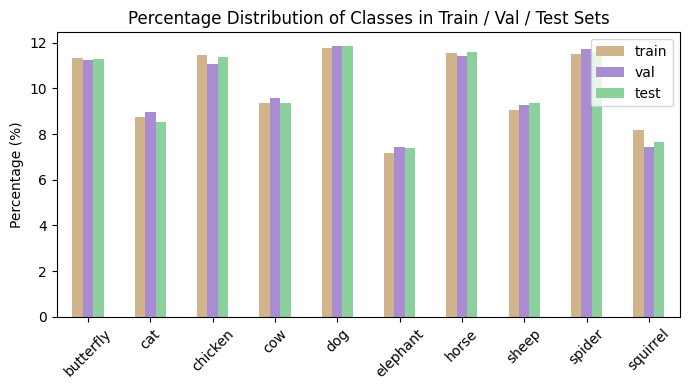

In [64]:
# Helper function to count labels and return a Series
def count_labels(dataset):
    label_ids = dataset.targets
    label_names = [class_names[i] for i in label_ids]
    return pd.Series(label_names).value_counts().sort_index()

# Count labels
train_counts = count_labels(train_dataset)
val_counts = count_labels(val_dataset)
test_counts = count_labels(test_dataset)

# Combine into one DataFrame
df_counts = pd.DataFrame({
    'train': train_counts,
    'val': val_counts,
    'test': test_counts
}).fillna(0).astype(int)

# Convert to percentages
df_percent = df_counts.divide(df_counts.sum(axis=0), axis=1) * 100

# Plot
custom_colors = {
    'train': '#D2B48C',
    'val': '#A98CD1',
    'test': '#8CD19D'
}

# Plot with custom colors
df_percent.plot(kind='bar', figsize=(7, 4), color=[custom_colors[col] for col in df_percent.columns])
plt.title("Percentage Distribution of Classes in Train / Val / Test Sets")
plt.ylabel("Percentage (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### Show sample images


In [93]:
samples = []
seen_classes = set()

for idx in range(len(train_dataset)):
    _, label = train_dataset.samples[idx]
    if label not in seen_classes:
        image, label_idx = train_dataset[idx]
        samples.append((image, class_names[label_idx]))
        seen_classes.add(label)
    if len(seen_classes) == len(class_names):
        break

display_transform = transforms.Compose([
    transforms.ToTensor()
])

images = [display_transform(img) for img, _ in samples]
labels = [label for _, label in samples]

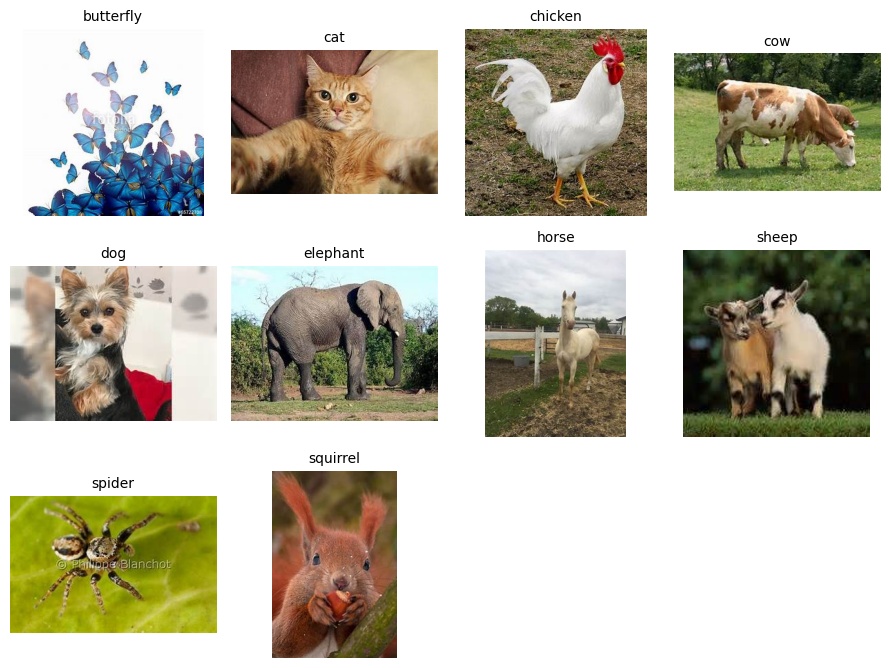

In [94]:
n_images = len(images)
nrows = (n_images + 2) // 3
ncols = 4

plt.figure(figsize=(9, 9))
for i, sample in enumerate(images):
    plt.subplot(nrows, ncols, i + 1)
    plt.imshow(sample.permute(1, 2, 0))  # CHW → HWC
    plt.title(labels[i], fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

## NER Dataset EDA


In [101]:
ner_data_dir = '../data/texts'
train_ner_path = Path(ner_data_dir) / 'train_ner.json'
val_ner_path = Path(ner_data_dir) / 'val_ner.json'
test_ner_path = Path(ner_data_dir) / 'test_ner.json'

# Load a sample
with open(train_ner_path, 'r', encoding='utf-8') as f:
    ner_data = json.load(f)
print(f'Total NER train samples: {len(ner_data)}')
print('Sample:', ner_data[1])

Total NER train samples: 872
Sample: {'sentence': 'A red cow is running across a lake.', 'tokens': ['a', 'red', 'cow', 'is', 'running', 'across', 'a', 'lake'], 'labels': ['O', 'O', 'B-ANIMAL', 'O', 'O', 'O', 'O', 'O']}


### Class distribution


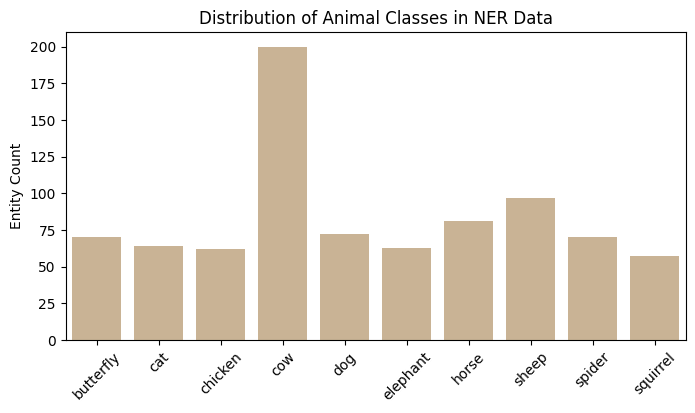

In [ ]:
# Count occurrences of each animal entity in the NER data
animal_counts = {animal: 0 for animal in class_names}

for sample in ner_data:
    tokens = sample['tokens']
    labels = sample['labels']
    for token, label in zip(tokens, labels):
        if label == 'B-ANIMAL':
            if token in animal_counts:
                animal_counts[token] += 1

# Plot the distribution
plt.figure(figsize=(8, 4))
sns.barplot(x=list(animal_counts.keys()), y=list(animal_counts.values()), color='tan')
plt.title('Distribution of Animal Classes in NER Data')
plt.ylabel('Entity Count')
plt.xticks(rotation=45)
plt.show()

### Example: show sentences with animal entities


In [104]:
for sample in ner_data[:5]:
    tokens = sample['tokens']
    labels = sample['labels']
    print(' '.join(tokens))
    print('Labels:', labels)
    print()

circus horses danced on their hind legs while performers balanced gracefully on their backs
Labels: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']

a red cow is running across a lake
Labels: ['O', 'O', 'B-ANIMAL', 'O', 'O', 'O', 'O', 'O']

the chicken processing plant implemented new welfare standards ensuring that birds were handled humanely throughout every stage of the production process
Labels: ['O', 'B-ANIMAL', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']

a pale grey cow is mimicking in a park
Labels: ['O', 'O', 'O', 'B-ANIMAL', 'O', 'O', 'O', 'O', 'O']

sheep disease prevention relies on vaccination programs biosecurity measures and regular health monitoring by qualified veterinary professionals
Labels: ['B-ANIMAL', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']

